In [116]:
import numpy as np
import openpyxl as xl
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Verileri Düzenleme için Kalıplar

In [117]:
economic_units = ['Briket','Briket Fabrikaları ','Diğer  Sektörler', 'Diğer Sektörler','DİĞER SEKTÖRLER','ENERJİ DIŞI TÜKETİM',
                  'Elektrik Santralları', 'Elektrik Santralları ', 'Elektrik Santralleri', 'Elektrik ve Isı Üretimi4', 'Elektrik Üretimi', 'Enerji Dışı', 'Enerji Dışı Kullanım',
                  'Hava Gazı Fab.    ', 'Havagazı Fabrikaları', 'Isı Üretimi', 'Isı Üretimi6', 'Kok Fabrikaları', 'Kok Fabrikaları    ', 'Kok Fırınları', 'Kombine Isı Santralleri',
                  'Konut ', 'Konut ve Hizmetler', 'Petrol Rafinerileri', 'Petrol Rafinerileri ', 'SANAYİ TÜKETİMİ', 'SEKTÖRLER TOPLAMI',
                  'Sanayi Tüketimi', 'Sektörler Toplamı', 'Stok Değişimi         (+/-)', 'Stok Değişimi (+/-)', 'Tarım', 'Tarım ve Hayvancılık', 'Ticaret ve Hizmetler', 'ULAŞTIRMA',
                  'Ulaştırma', 'Yerli Üretim             (+)', 'Yerli Üretim (+)', 'Yüksek Fırınlar', 'ÇEVRİM VE ENERJİ SEKTÖRÜ', 'Çevrim ve Enerji Sektörü', 'İhracat                       (-)',
                  'İhracat (-)', 'İhrakiye                      (-)', 'İhrakiye (-)', 'İthalat                        (+)', 'İthalat (+)', 'İç Tüketim ve Kayıp']
economic_units_2 = { "Briket Fabrikaları"       : ['Briket','Briket Fabrikaları '],
                     "DİĞER SEKTÖR"             : ['Diğer  Sektörler', 'Diğer Sektörler','DİĞER SEKTÖRLER',],
                     "Enerji Dışı Tüketim"      : ['ENERJİ DIŞI TÜKETİM','Enerji Dışı', 'Enerji Dışı Kullanım',],
                     "Elektrik Üretimi"         : ['Elektrik Santralları', 'Elektrik Santralları ', 'Elektrik Santralleri', 'Elektrik ve Isı Üretimi4', 'Elektrik Üretimi', ],
                     "Havagazı"                 : ['Hava Gazı Fab.    ', 'Havagazı Fabrikaları',],
                     "Isı"                      : ['Isı Üretimi', 'Isı Üretimi6',],
                     "Kok Fabrikaları"          : ['Kok Fabrikaları    ', 'Kok Fırınları', ],
                     "Rafineriler"              : ['Petrol Rafinerileri', 'Petrol Rafinerileri ',],
                     "SANAYİ"                   : ['SANAYİ TÜKETİMİ','Sanayi Tüketimi',],
                     "SEKTÖRLER TOPLAM"         : ['SEKTÖRLER TOPLAMI', 'Sektörler Toplamı',],
                     "Stok Değişimi"            : ['Stok Değişimi         (+/-)', 'Stok Değişimi (+/-)',],
                     "ULAŞTIRMA"                : ['Ulaştırma',],
                     "YERLİ ÜRETİM"             : ['Yerli Üretim             (+)', 'Yerli Üretim (+)',],
                     "CES"                      : ['ÇEVRİM VE ENERJİ SEKTÖRÜ', 'Çevrim ve Enerji Sektörü',],
                     "İhracat"                  : ['İhracat                       (-)', 'İhracat (-)',],
                     "İhrakiye"                 : ['İhrakiye                      (-)', 'İhrakiye (-)',],
                     "İthalat"                  : ['İthalat                        (+)', 'İthalat (+)',],
                     "Konut"                    : ['Konut ']
}
economic_units_3 = { 'Brik. Fab.': ['Briket','Briket Fabrikaları '],
                     "DİĞER SEK.": ['Diğer  Sektörler', 'Diğer Sektörler','DİĞER SEKTÖRLER',],
                     'Enj Dış.'  : ['ENERJİ DIŞI TÜKETİM','Enerji Dışı', 'Enerji Dışı Kullanım',],
                     'Elek. Ürt.': ['Elektrik Santralları', 'Elektrik Santralları ', 'Elektrik Santralleri', 'Elektrik ve Isı Üretimi4', 'Elektrik Üretimi', ],
                     'Havagazı'  : ['Hava Gazı Fab.    ', 'Havagazı Fabrikaları',],
                     "Isı"       : ['Isı Üretimi', 'Isı Üretimi6',],
                     'Kok Fab.'  : ['Kok Fabrikaları    ', 'Kok Fırınları', ],
                     "Rafineri"  : ['Petrol Rafinerileri', 'Petrol Rafinerileri ',],
                     "SANAYİ"    : ['SANAYİ TÜKETİMİ','Sanayi Tüketimi',],
                     "SEK. TOP." : ['SEKTÖRLER TOPLAMI', 'Sektörler Toplamı',],
                     "Stok Değ." : ['Stok Değişimi         (+/-)', 'Stok Değişimi (+/-)',],
                     "ULAŞTIRMA" : ['Ulaştırma',],
                     "YERLİ ÜRT.": ['Yerli Üretim             (+)', 'Yerli Üretim (+)',],
                     "ÇES"       : ['ÇEVRİM VE ENERJİ SEKTÖRÜ', 'Çevrim ve Enerji Sektörü',],
                     "İhracat"   : ['İhracat                       (-)', 'İhracat (-)',],
                     "İhrakiye"  : ['İhrakiye                      (-)', 'İhrakiye (-)',],
                     "İthalat"   : ['İthalat                        (+)', 'İthalat (+)',],
                     "Konut"     : ['Konut '],
                     'Kon. Hzm'  : ["Konut ve Hizmetler"],
                     'Tic. Hzm.' : ["Ticaret ve Hizmetler"],
                     'Tar. Hay.' : ["Tarım ve Hayvancılık", 'Tarım']
                    
}
energy_units = {"Bioenerji ve Atıklar" : ['Bioyakıt', 'Biyoenerji ve Atıklar', 'Biyoenerji ve Atıklar7', 'Biyoyakıt', 'H.Bit.Art.',
                                         'Hay. ve Bit.Art.', 'Hay.Bit.Art.', 'Hay.ve', 'Odun', 'Odun  ', 'Yakacak Odun',],
                "Dogalgaz"             : ['D.Gaz', 'Doğal Gaz3', 'Doğalgaz', 'Doğalgaz3',],
                "Jeotermal Isı - D"    : ['Jeo. Elek.', 'Jeo. Isı', 'Jeo. Isı ', 'Jeo.Elek.', 'Jeo.Isı', 'Jeo.Isı ', 'Jeo.Isı -D.',
                                          'Jeo.Isı ve Diğer Isı', 'Jeo/Ele', 'Jeoter. Elekt.', 'Jeoter. Isı', 'Jeotermal', 'Jeotermal9',' Diğer Isı','Isı ', 'Jeo.Isı ve Diğer Isı', ],
                "Linyit"               : [ 'Linyit', 'Linyit ',],
                "Petro Kok"            : [ 'P. Kok', 'P.Kok', 'P.kok', 'PetroKok',],
                "Petrol Ürünleri"      : ['Petrol Ürünleri2',],
                "Taş Kömürü"           : ['T.Köm.', 'T.Kömürü', 'Taş Kömürü',],
                "Katı Yakıt"           : ['K.Yak.', 'Top. Katı Yak.', 'Top.Katı Yak.', ],
                "Türetilmiş Gazlar"    : [ 'Türetilmiş Gazlar', 'Türetilmiş Gazlar1',],
                "Şehir Gazı"           : [ 'Şehir Gazı', 'Şehirgazı','Hava Gazı', 'Havagazı',]
               }
energy_units2 = {"Bioenerji ve Atıklar" : ['Bioyakıt', 'Biyoenerji ve Atıklar', 'Biyoenerji ve Atıklar7', 'Biyoyakıt', 'H.Bit.Art.',
                                         'Hay. ve Bit.Art.', 'Hay.Bit.Art.', 'Hay.ve', 'Odun', 'Odun  ', 'Yakacak Odun',],
                "Doğalgaz"             : ['D.Gaz', 'Doğal Gaz3', 'Doğalgaz', 'Doğalgaz3', 'Doğalgaz1'],
                "Jeotermal Isı - D"    : ['Jeo. Elek.', 'Jeo. Isı', 'Jeo. Isı ', 'Jeo.Elek.', 'Jeo.Isı', 'Jeo.Isı ', 'Jeo.Isı -D.',
                                          'Jeo.Isı ve Diğer Isı', 'Jeo/Ele', 'Jeoter. Elekt.', 'Jeoter. Isı', 'Jeotermal', 'Jeotermal9',' Diğer Isı','Isı ', 'Jeo.Isı ve Diğer Isı', 'JeoTermal Isı '],
                "Linyit"               : [ 'Linyit', 'Linyit ',],
                "Petro Kok"            : [ 'P. Kok', 'P.Kok', 'P.kok', 'PetroKok',],
                "Petrol Ürünleri"      : ['Petrol Ürünleri2',],
                "Taş Kömürü"           : ['T.Köm.', 'T.Kömürü', 'Taş Kömürü',],
                "Katı Yakıt"           : ['K.Yak.', 'Top. Katı Yak.', 'Top.Katı Yak.', ],
                "Türetilmiş Gazlar"    : [ 'Türetilmiş Gazlar', 'Türetilmiş Gazlar1',],
                "Şehir Gazı"           : [ 'Şehir Gazı', 'Şehirgazı','Hava Gazı', 'Havagazı',]
               }

#---------------------------------------------------

wb = xl.load_workbook("./Enerji Denge Tabloları/2016.xlsx")
sheet = wb[wb.sheetnames[1]]
wb2 = xl.load_workbook("./Enerji Denge Tabloları/2019.xlsx")
sheet2 = wb2[wb2.sheetnames[1]]    

altbilesenler = []

for i in range(7,11):
    altbilesenler.append(sheet.cell(4, i).value)
    
for i in range(13,29):
    altbilesenler.append(sheet.cell(4, i).value)
    
for i in range(31,34):
    altbilesenler.append(sheet.cell(4, i).value)
    
altbilesenler.append(sheet2.cell(4, 23).value)     
altbilesenler.append(sheet2.cell(4, 30).value) 
altbilesenler.append(sheet2.cell(4, 31).value) 

#---------------------------------------------------


wb = xl.load_workbook("./Enerji Denge Tabloları/2016.xlsx")
sheet = wb[wb.sheetnames[0]]

wb2 = xl.load_workbook("./Enerji Denge Tabloları/2019.xlsx")
sheet2 = wb2[wb2.sheetnames[1]]    

altbilesenler2 = []

for i in range(7,11):
    altbilesenler2.append(sheet.cell(4, i).value)
    
for i in range(31,34):
    altbilesenler2.append(sheet.cell(4, i).value)
      
altbilesenler2.append(sheet2.cell(4, 30).value) 
altbilesenler2.append(sheet2.cell(4, 31).value) 



# FONKSİYONLAR

In [118]:
# Satırlarda yıllar sütunlarda enerji türleri olan dataframe oluşturma
def generate_df(df_orijinal):


    df_new = pd.DataFrame(index = range(1972, 2023),
                              columns = list(set(df_orijinal.Energy)))
    for row in df_new.index:
        for col in df_new.columns:
            df_new.loc[row, col] = np.sum(df_orijinal.loc[(df_orijinal["Year"] == row) &
                                                          (df_orijinal["Energy"] == col)].Value)

    df_new.loc["Toplam"] = np.sum(df_new).to_list()
    df_new.sort_values(by = ["Toplam"], axis =1, inplace = True, ascending = False)
    df_new["Toplam"] = np.sum(df_new, axis = 1).to_list()


    for col in df_new.columns:
        if df_new.loc["Toplam", col] == 0:
            del df_new[col]
    return df_new

df_index_values = ["YERLİ ÜRT.", 'İthalat', 'İhracat', 'İhrakiye', 'Stok Değ.', 'ÇES', 'Elek. Ürt.', 'Yüksek Fır.',
 'Brik. Fab.', 'Havagazı', 'Kok Fab.', 'Kom. Isı Sant.', 'Isı', 'Rafineri', 'İç Tüketim ve Kayıp',
 'SEK. TOP.', 'SANAYİ', 'ULAŞTIRMA', 'DİĞER SEK.', 'Kon. Hzm', 'Konut', 'Tic. Hzm.', 
 'Tar. Hay.', 'Enj Dış.']

# Satırlarda iktisadi birimler sütunlarda yılların olduğu enerji bazlı dataframe oluşturma
def generate_df2(df_orijinal):
    df_new = pd.DataFrame(index = df_index_values,
                              columns = range(1972, 2023) )
    for row in df_new.index:
        for col in df_new.columns:
            df_new.loc[row, col] = np.sum(df_orijinal.loc[(df_orijinal["Year"] == col) &
                                                    (df_orijinal["Economic Unit"] == row)].Value)
            
    df_new["Toplam"] = np.sum(df_new, axis = 1).to_list()

    
    for row in df_new.index:
        for col in df_new.columns:
            value = df_new.loc[row, col]
            if value == 0:
                df_new.loc[row, col] = "-"
    return df_new

# Satırlarda yıllar sütunlarda enerji türleri olan dataframe için grafik oluşturma (%)
def plot(df):
    
    yıllar = df.index
    x_axes = np.arange(len(yıllar))
    width = 0.75

    col = df.columns[0]
    
    data_list = [(df[col].to_numpy() / df["Toplam"].to_numpy())*100 for col in df.columns[:-1]]

    data_list_str = df.columns[:-1]
    color_map = ["honeydew", "pink", "lightblue", "orange", "crimson", "yellowgreen",
                 "salmon", "teal", "wheat", "slategray", "aqua","royalblue",
                 "mediumpurple", "thistle", "silver", "darkorange", "gold", "white"]
    
    fig, ax = plt.subplots(figsize = (15,5))
    
    for i in range(len(data_list)):
        if i == 0:
            ax.bar(x_axes, data_list[i], width, edgecolor = "black", color = color_map[i], label = data_list_str[i] + " (%)")
        else: 
            array = np.zeros(len(data_list[i]))
            for j in range(i):
                array = array + data_list[j]
            ax.bar(x_axes, data_list[i], width, edgecolor = "black", color = color_map[i], label = data_list_str[i]+ " (%)",
                  bottom = array)
    
    for i in range(len(data_list)):
        if i == 0:
            for j in x_axes:
                if data_list[i][j] > 10:
                    ax.text(j-0.2, 5, str(round(data_list[i][j],1)), rotation = 90, fontsize = 8, fontweight = "bold")
        else:
            for j in x_axes:
                if data_list[i][j] > 10:
                    height = 0
                    for k in range(i):
                        height += data_list[k][j]
                    ax.text(j-0.2, 2 + height, str(round(data_list[i][j],1)), rotation = 90, fontsize = 8, fontweight = "bold")    
                
    ax.set_xlim(xmin = -1, xmax = len(data_list[i]))
    ax.set_ylim(ymin = 0, ymax = 130)

    ax.legend(ncol = 1 if len(data_list) < 2 else int(len(data_list) / 3)+1 , edgecolor = "black", loc = 2)
 

    ax.set_xticks(x_axes);
    ax.set_xticklabels(yıllar, rotation = 90, fontweight = "bold");

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
 
def edt_all_datas(start_year, finish_year):
    
    row_index = {}
    col_index = {}
    row_values = {str(year) : [] for year in range(start_year, finish_year)}
    col_values = {str(year) : [] for year in range(start_year, finish_year)}
    all_datas_list = []


    for i in range(start_year, finish_year): # Başlangıç ve bitiş yılları / ilave veri eklendiğinde 63. satırın da ontrol edilmesi gerekir.

        wb = xl.load_workbook("./Enerji Denge Tabloları/" + str(i)+".xlsx")


        if i < 1990:

            # 1990'dan önceki EDT'lerde satır (istisadi birimler) ve sütun (Enerji Birimleri)
            # başlangıç ve bitiş değerleri
            row_index[i] = (57,96)
            col_index[i] = (2, 20) 

            row_start  = row_index[i][0]
            row_finish = row_index[i][1]
            col_start  = col_index[i][0]
            col_finish = col_index[i][1]

            sheet = wb[wb.sheetnames[0]] # 1990 öncesi tek sayfada hem orijinal hem tep cinsinden

            # EDT'deki satır (ekonomik birim) değerlerinin çekilmesi
            for j in range(row_start,row_finish):
                value = sheet.cell(j, 1).value
                if isinstance(value, type(None)):
                    continue
                else:
                    row_values[str(i)].append(sheet.cell(j, 1).value) 

            # EDT'deki sütun (enerji birimi) değerlerinin çekilmesi    
            for k in range(col_start, col_finish):
                col_values[str(i)].append(sheet.cell(56,k).value)

            # EDT'deki bilgilerin çekilerek "all_datas_list" listesine atilması
            for x in range(57,100):
                for y in range(2,20):              
                    sheet_row_value = sheet.cell(x, 1).value
                    sheet_col_value = sheet.cell(56, y).value
                    sheet_val = sheet.cell(x, y).value

                    if type(sheet_row_value) == str:
                        all_datas_list.append([i, sheet_row_value, sheet_col_value,sheet_val])  # Listeye Kaydetmek için 

        if i >= 1990:

             # 1990'dan sonraki EDT'lerde satır (istisadi birimler) başlangıç ve bitiş değerleri
            if i == 1995 or i == 1997 or i == 1998 or i == 1999:
                row_index[i] = (6,46)  
            elif i == 2010:
                row_index[i] = (5,44)
            elif i == 2011 or i == 2012:
                row_index[i] = (5,50) 
            elif i == 2013:
                row_index[i] = (5,47)
            elif i == 2014:
                row_index[i] = (6,52) 
            elif i >= 2015:
                row_index[i] = (6,78)  
            else:
                row_index[i] = (6,47) 

            sheet = wb[wb.sheetnames[1]] # 1990 sonrası ilk sayfa orijinal ikinci sayfa tep

            # 1990'dan sonraki EDT'lerde sütun (enerji birimleri) başlangıç ve bitiş değerleri
            for row in range(1, 10):
                val = sheet.cell(row, 2).value
                if type(val) == str and "Köm" in val:
                    break

            for col in range(2, 100):
                val = sheet.cell(row, col).value
                if type(val) != str:
                    break   

            col_index[int(i)] = (2, col-1)

            row_start  = row_index[i][0]
            row_finish = row_index[i][1]
            col_start  = col_index[i][0]
            col_finish = col_index[i][1]

            # EDT'deki satır (ekonomik birim) değerlerinin çekilmesi
            for j in range(row_start,row_finish):
                value = sheet.cell(j, 1).value
                if isinstance(value, type(None)):
                    continue
                else:
                    row_values[str(i)].append(sheet.cell(j, 1).value)

            # EDT'deki sütun (enerji birimi) değerlerinin çekilmesi 
            for k in range(col_start, col_finish):
                col_values[str(i)].append(sheet.cell(row_start-2,k).value)


            # EDT'deki bilgilerin çekilerek "all_datas_list" listesine atilması   
            for x in range(row_start,row_finish):
                for y in range(col_start,col_finish):
                    sheet_row_value = sheet.cell(x, 1).value
                    sheet_col_value = sheet.cell(row_start-2, y).value
                    sheet_val = sheet.cell(x, y).value

                    if type(sheet_row_value) == str:
                        all_datas_list.append([i, sheet_row_value,sheet_col_value,sheet_val]) 

    # # all_datas_list değişkeninde dataframe oluşturulması
    df_all_datas = pd.DataFrame(all_datas_list, index = range(1, len(all_datas_list) + 1),
                      columns = ["Year", "Economic Unit", "Energy", "Value"])

    for row in df_all_datas.index:
        if isinstance(df_all_datas.loc[row, "Value"], type(None)) or  df_all_datas.loc[row, "Value"] == "" or type(df_all_datas.loc[row, "Value"]) == str:
            df_all_datas.loc[row, "Value"] = 0
            
    return df_all_datas

def edt_all_datas2(start_year, finish_year):
    
    row_index = {}
    col_index = {}
    row_values = {str(year) : [] for year in range(start_year, finish_year)}
    col_values = {str(year) : [] for year in range(start_year, finish_year)}
    all_datas_list = []


    for i in range(start_year, finish_year): # Başlangıç ve bitiş yılları / ilave veri eklendiğinde 63. satırın da ontrol edilmesi gerekir.

        wb = xl.load_workbook("./Enerji Denge Tabloları/" + str(i)+".xlsx")
        sheet = wb[wb.sheetnames[0]] # 1990 öncesi tek sayfada hem orijinal hem tep cinsinden


        if i < 1990:

            # 1990'dan önceki EDT'lerde satır (istisadi birimler) ve sütun (Enerji Birimleri)
            # başlangıç ve bitiş değerleri
            row_index[i] = (8,47)
            col_index[i] = (2, 20) 

            row_start  = row_index[i][0]
            row_finish = row_index[i][1]
            col_start  = col_index[i][0]
            col_finish = col_index[i][1]

            # EDT'deki satır (ekonomik birim) değerlerinin çekilmesi
            for j in range(row_start,row_finish):
                value = sheet.cell(j, 1).value
                if isinstance(value, type(None)):
                    continue
                else:
                    row_values[str(i)].append(sheet.cell(j, 1).value) 

            # EDT'deki sütun (enerji birimi) değerlerinin çekilmesi    
            for k in range(col_start, col_finish):
                col_values[str(i)].append(sheet.cell(56,k).value)

            # EDT'deki bilgilerin çekilerek "all_datas_list" listesine atilması
            for x in range(57,100):
                for y in range(2,20):              
                    sheet_row_value = sheet.cell(x, 1).value
                    sheet_col_value = sheet.cell(56, y).value
                    sheet_val = sheet.cell(x, y).value

                    if type(sheet_row_value) == str:
                        all_datas_list.append([i, sheet_row_value, sheet_col_value,sheet_val])  # Listeye Kaydetmek için 

        if i >= 1990:

             # 1990'dan sonraki EDT'lerde satır (istisadi birimler) başlangıç ve bitiş değerleri
                
            if 1996 <= i <=  1999:
                row_index[i] = (7,46)
            elif i == 1995:
                row_index[i] = (7,45)
            elif i == 2010:
                row_index[i] = (6,44)     
            elif 2015 <= i <=  2021:
                row_index[i] = (6,77)
            elif i == 2011:
                row_index[i] = (6,50)
            elif i == 2012:
                row_index[i] = (11,55)
            elif i == 2013:
                row_index[i] = (6,47)
            elif i == 2014:
                row_index[i] = (7,52)
            else:
                row_index[i] = (7,47)      
                
            # 1990'dan sonraki EDT'lerde sütun (enerji birimleri) başlangıç ve bitiş değerleri
            for row in range(1, 10):
                val = sheet.cell(row, 2).value
                if type(val) == str and "Köm" in val:
                    break

            for col in range(2, 100):
                val = sheet.cell(row, col).value
                if type(val) != str:
                    break   

            col_index[int(i)] = (2, col)

            row_start  = row_index[i][0]
            row_finish = row_index[i][1]
            col_start  = col_index[i][0]
            col_finish = col_index[i][1]

            # EDT'deki satır (ekonomik birim) değerlerinin çekilmesi
            for j in range(row_start,row_finish):
                value = sheet.cell(j, 1).value
                if isinstance(value, type(None)):
                    continue
                else:
                    row_values[str(i)].append(sheet.cell(j, 1).value)

            # EDT'deki sütun (enerji birimi) değerlerinin çekilmesi 
            for k in range(col_start, col_finish):
                col_values[str(i)].append(sheet.cell(row_start-2,k).value)


            # EDT'deki bilgilerin çekilerek "all_datas_list" listesine atilması   
            for x in range(row_start,row_finish):
                for y in range(col_start,col_finish):
                    sheet_row_value = sheet.cell(x, 1).value
                    sheet_col_value = sheet.cell(row_start-2, y).value
                    sheet_val = sheet.cell(x, y).value

                    if type(sheet_row_value) == str:
                        all_datas_list.append([i, sheet_row_value,sheet_col_value,sheet_val]) 

    # # all_datas_list değişkeninde dataframe oluşturulması
    df_all_datas = pd.DataFrame(all_datas_list, index = range(1, len(all_datas_list) + 1),
                      columns = ["Year", "Economic Unit", "Energy", "Value"])

    for row in df_all_datas.index:
        if isinstance(df_all_datas.loc[row, "Value"], type(None)) or  df_all_datas.loc[row, "Value"] == "" or type(df_all_datas.loc[row, "Value"]) == str:
            df_all_datas.loc[row, "Value"] = 0
            
    return df_all_datas

def data_editing(df_original):
    # Verilerden Sanayilerin alt sektörlerinin çıkarılması
    # Aynı olup farklı isimlendirilen ekonomik birimlerin düzenlenmesi
    df_edt_summary1 = df_original[df_original["Economic Unit"].isin(economic_units)]

    for index in df_edt_summary1.index:
        value = df_edt_summary1.loc[index, "Economic Unit"]
        for key in economic_units_2.keys():
            if value in economic_units_2[key]:
                df_edt_summary1.loc[index, "Economic Unit"] = key
                break

    # 2015 ve sonrası için türetilmiş gazlar, petrol ürünleri 
    # ve bioenerji ve atıkların alt bileşenlerinin silinmesi
    dropped_values = df_edt_summary1[(df_edt_summary1["Energy"].isin(altbilesenler)) 
                                     & (df_edt_summary1["Year"] >= 2015)]
    df_edt_summary2 = pd.concat([df_edt_summary1, 
                                 dropped_values, dropped_values]).drop_duplicates(keep=False) 

    # Aynı olup farklı isimlendirilen enerji türlerinin düzenlenmesi
    for row in df_edt_summary2.index:
        value = df_edt_summary2.loc[row, "Energy"]

        for key in energy_units.keys():
            if value in energy_units[key]:
                df_edt_summary2.loc[row, "Energy"] = key

    # Katı yakitlar, Taş kömürü Linyit Asfaltit İkincil Kömür P.kok, odun 
    # ve Hbit Art toplamından oluştuğundan verisetinden çıkarıldı. 
    # 1972 - 1989 arasındaki ETD'lerden
    df_edt_summary2 = df_edt_summary2[df_edt_summary2["Energy"].str.contains("Katı Yakıt") == False]
    
    return df_edt_summary2

def data_editing2(df_original):
    # Verilerden Sanayilerin alt sektörlerinin çıkarılması
    # Aynı olup farklı isimlendirilen ekonomik birimlerin düzenlenmesi
    df_edt_summary1 = df_original[df_original["Economic Unit"].isin(economic_units)]

    for index in df_edt_summary1.index:
        value = df_edt_summary1.loc[index, "Economic Unit"]
        for key in economic_units_3.keys(): # Farklı olan kısım
            if value in economic_units_3[key]: # Farklı olan kısım
                df_edt_summary1.loc[index, "Economic Unit"] = key
                break

    # 2015 ve sonrası için türetilmiş gazlar, petrol ürünleri 
    # ve bioenerji ve atıkların alt bileşenlerinin silinmesi
    dropped_values = df_edt_summary1[(df_edt_summary1["Energy"].isin(altbilesenler2)) 
                                     & (df_edt_summary1["Year"] >= 2015)]
    df_edt_summary2 = pd.concat([df_edt_summary1, 
                                 dropped_values, dropped_values]).drop_duplicates(keep=False) 

    # Aynı olup farklı isimlendirilen enerji türlerinin düzenlenmesi
    for row in df_edt_summary2.index:
        value = df_edt_summary2.loc[row, "Energy"]

        for key in energy_units2.keys():
            if value in energy_units2[key]:
                df_edt_summary2.loc[row, "Energy"] = key

    # Katı yakitlar, Taş kömürü Linyit Asfaltit İkincil Kömür P.kok, odun 
    # ve Hbit Art toplamından oluştuğundan verisetinden çıkarıldı. 
    # 1972 - 1989 arasındaki ETD'lerden
    df_edt_summary2 = df_edt_summary2[df_edt_summary2["Energy"].str.contains("Katı Yakıt") == False]
    
    return df_edt_summary2 


# Tüm EDT'lerdeki Tüm Verilerin Çekilmesi

In [119]:
# 2.1. Bölüm
df_all_datas = edt_all_datas(1972, 2023)
df_all_datas.head()

,Year,Economic Unit,Energy,Value
1,1972,Yerli Üretim (+),T.Kömürü,2831.01
2,1972,Yerli Üretim (+),Linyit,2202.6
3,1972,Yerli Üretim (+),Asfaltit,72.24
4,1972,Yerli Üretim (+),İkincil Kömür,0
5,1972,Yerli Üretim (+),P. Kok,0


In [120]:
# 2.3. Bölüm
df_all_datas2 = edt_all_datas2(1972, 2023)
df_all_datas2.head()

,Year,Economic Unit,Energy,Value
1,1972,Yerli Üretim (+),T.Kömürü,2831.01
2,1972,Yerli Üretim (+),Linyit,2202.6
3,1972,Yerli Üretim (+),Asfaltit,72.24
4,1972,Yerli Üretim (+),İkincil Kömür,0
5,1972,Yerli Üretim (+),P. Kok,0


# Verilerin Düzenlenmesi

In [121]:
# 2.1. Bölüm
df_edt = data_editing(df_all_datas)
df_edt.head()

,Year,Economic Unit,Energy,Value
1,1972,YERLİ ÜRETİM,Taş Kömürü,2831.01
2,1972,YERLİ ÜRETİM,Linyit,2202.6
3,1972,YERLİ ÜRETİM,Asfaltit,72.24
4,1972,YERLİ ÜRETİM,İkincil Kömür,0
5,1972,YERLİ ÜRETİM,Petro Kok,0


In [122]:
# 2.3. Bölüm
df_edt2 = data_editing2(df_all_datas2)
df_edt2.head()

,Year,Economic Unit,Energy,Value
1,1972,YERLİ ÜRT.,Taş Kömürü,2831.01
2,1972,YERLİ ÜRT.,Linyit,2202.6
3,1972,YERLİ ÜRT.,Asfaltit,72.24
4,1972,YERLİ ÜRT.,İkincil Kömür,0
5,1972,YERLİ ÜRT.,Petro Kok,0


# EDT'lerden gerekli olan verilerin çekilmesi

In [123]:
df_yerli_üretim = df_edt.loc[df_edt["Economic Unit"] == "YERLİ ÜRETİM"]
df_ithalat      = df_edt.loc[df_edt["Economic Unit"] == "İthalat"]
df_sektörler    = df_edt.loc[df_edt["Economic Unit"] == "SEKTÖRLER TOPLAM"]
df_sanayi       = df_edt.loc[df_edt["Economic Unit"] == "SANAYİ"]
df_ulasim       = df_edt.loc[df_edt["Economic Unit"] == "ULAŞTIRMA"]
df_diger_sektör = df_edt.loc[df_edt["Economic Unit"] == "DİĞER SEKTÖR"]
df_enerji_disi  = df_edt.loc[df_edt["Economic Unit"] == "Enerji Dışı Tüketim"]
df_konut        = df_edt.loc[df_edt["Economic Unit"] == "Konut"]
df_konut_himzet = df_edt.loc[df_edt["Economic Unit"] == "Konut ve Hizmetler"]
df_tarim        = df_edt.loc[df_edt["Economic Unit"] == "Tarım"]
df_tarim_hayv   = df_edt.loc[df_edt["Economic Unit"] == "Tarım ve Hayvancılık"]
df_tic_hzm      = df_edt.loc[df_edt["Economic Unit"] == "Ticaret ve Hizmetler"]
df_ihracat      = df_edt.loc[df_edt["Economic Unit"] == "İhracat"]
df_ihrakiye     = df_edt.loc[df_edt["Economic Unit"] == "İhrakiye"]
df_CES_arz      = df_edt.loc[(df_edt["Economic Unit"] == "CES") & (df_edt["Value"] > 0)]
df_CES_kullanım = df_edt.loc[(df_edt.loc[:,"Economic Unit"] == "CES") &
                                       (df_edt.loc[:,"Value"] < 0)]
df_CES_kullanım.loc[:,"Value"] = df_CES_kullanım.loc[:,"Value"]*-1

# Verilerin satırlarda yıllar sütunlarda Enerji Türleri olacak şekle dönüştürülmesi

In [124]:
df_yerli_üretim2  = generate_df(df_yerli_üretim)  
df_ithalat2       = generate_df(df_ithalat)  
df_sektörler2     = generate_df(df_sektörler)
df_sanayi2        = generate_df(df_sanayi)
df_ulasim2        = generate_df(df_ulasim)
df_diger_sektör2  = generate_df(df_diger_sektör)
df_enerji_disi2   = generate_df(df_enerji_disi)
df_konut2         = generate_df(df_konut)
df_konut_hizmet2  = generate_df(df_konut_himzet)
df_tarim2         = generate_df(df_tarim)
df_tarim_hayv2    = generate_df(df_tarim_hayv)
df_tic_hzm2       = generate_df(df_tic_hzm)
df_ihracat2       = generate_df(df_ihracat)
df_ihrakiye2      = generate_df(df_ihrakiye)
df_CES_arz2       = generate_df(df_CES_arz)
df_CES_kullanım2  = generate_df(df_CES_kullanım)


# Toplam Arz (Yurtiçi Üretim, İthalat, ÇES) Tablosu Oluşturma

In [125]:
df_toplam_arz = pd.DataFrame(index = df_yerli_üretim2.index,
                        columns = ["Yerli Üretim", "İthalat","Çevrim ve Enerji", "Toplam"])

df_toplam_arz["Yerli Üretim"]      = df_yerli_üretim2["Toplam"].to_numpy()
df_toplam_arz["İthalat"]           = df_ithalat2["Toplam"].to_numpy()
df_toplam_arz["Çevrim ve Enerji"]  = df_CES_arz2["Toplam"].to_numpy()
df_toplam_arz["Toplam"]            = df_yerli_üretim2["Toplam"].to_numpy() + df_ithalat2["Toplam"].to_numpy() + df_CES_arz2["Toplam"].to_numpy()
df_toplam_arz.head()

,Yerli Üretim,İthalat,Çevrim ve Enerji,Toplam
1972,15215.914,8648.850,1873.182,25737.946
1973,15650.208,9969.010,1950.450,27569.668
1974,16187.576,11019.700,1992.764,29200.040
1975,16472.954,11119.116,2229.200,29821.270
1976,16487.720,13987.522,2702.362,33177.604


# Toplam Kullanım Tablosu Oluşturma

In [126]:
df_kullanım = pd.DataFrame(index = range(1972, 2023),
                     columns = ["Sanayi", "Ulaşım", "Konut", "Konut ve Hizmetler", 
                                "Tarım", "Tarım ve Hayvancılık", "Ticaret ve Hizmetler", "Enerji Dışı"])

df_kullanım["Sanayi"]                  = df_sanayi2["Toplam"]
df_kullanım["Ulaşım"]                  = df_ulasim2["Toplam"]
df_kullanım["Konut"]                   = df_konut2["Toplam"]
df_kullanım["Konut ve Hizmetler"]      = df_konut_hizmet2["Toplam"]
df_kullanım["Tarım"]                   = df_tarim2["Toplam"]
df_kullanım["Tarım ve Hayvancılık"]    = df_tarim_hayv2["Toplam"]
df_kullanım["Ticaret ve Hizmetler"]    = df_tic_hzm2["Toplam"]
df_kullanım["Enerji Dışı"]             = df_enerji_disi2["Toplam"]

df_kullanım.loc["Toplam"] = np.sum(df_kullanım)
df_kullanım["Toplam"] = np.sum(df_kullanım, axis = 1)

df_kullanım.head()

,Sanayi,Ulaşım,Konut,Konut ve Hizmetler,Tarım,Tarım ve Hayvancılık,Ticaret ve Hizmetler,Enerji Dışı,Toplam
1972,4799.362,3884.418,0.0,9787.010,716.992,0.0,0.0,386.40,19574.182
1973,5185.690,4297.622,0.0,10209.954,721.794,0.0,0.0,450.45,20865.510
1974,5461.854,4644.928,0.0,10711.090,708.402,0.0,0.0,320.25,21846.524
1975,6286.234,5148.278,0.0,11098.564,695.250,0.0,0.0,516.60,23744.926
1976,6781.350,5741.234,0.0,12049.190,779.730,0.0,0.0,591.15,25942.654


# GRAFİKLER

### Şekil 11: Enerji Arz Türlerinin Toplam Enerji Arzı İçerisindeki Payı (1972 - 2021)

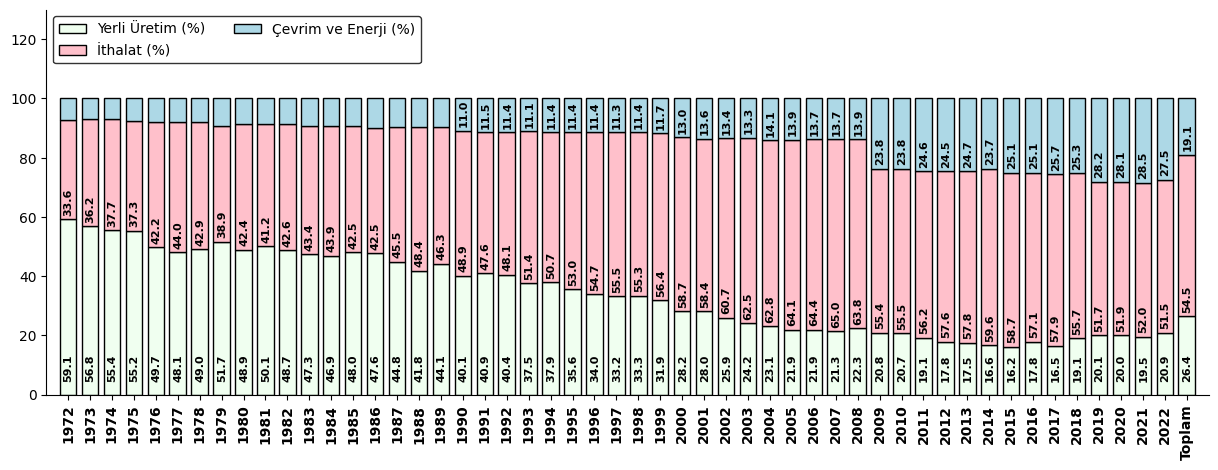

In [127]:
plot(df_toplam_arz)   


### Şekil 12: Toplam Yurt İçi Enerji Üretiminin Enerji Türlerine Göre Dağılımı (1972-2021) 

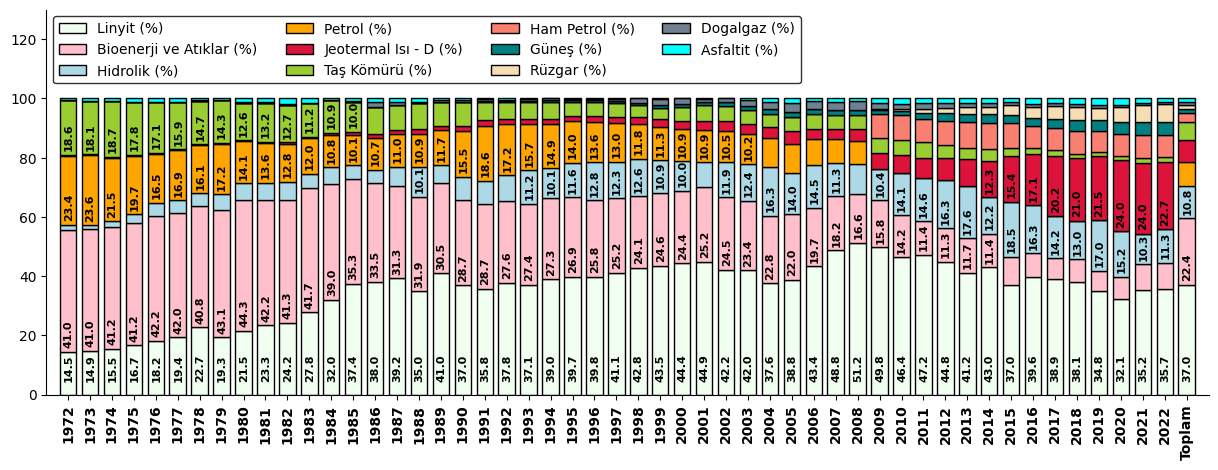

In [128]:
plot(df_yerli_üretim2)

### Şekil 13: Toplam Enerji İthalatın Enerji Türlerine Göre Dağılımı (1972-2021)  

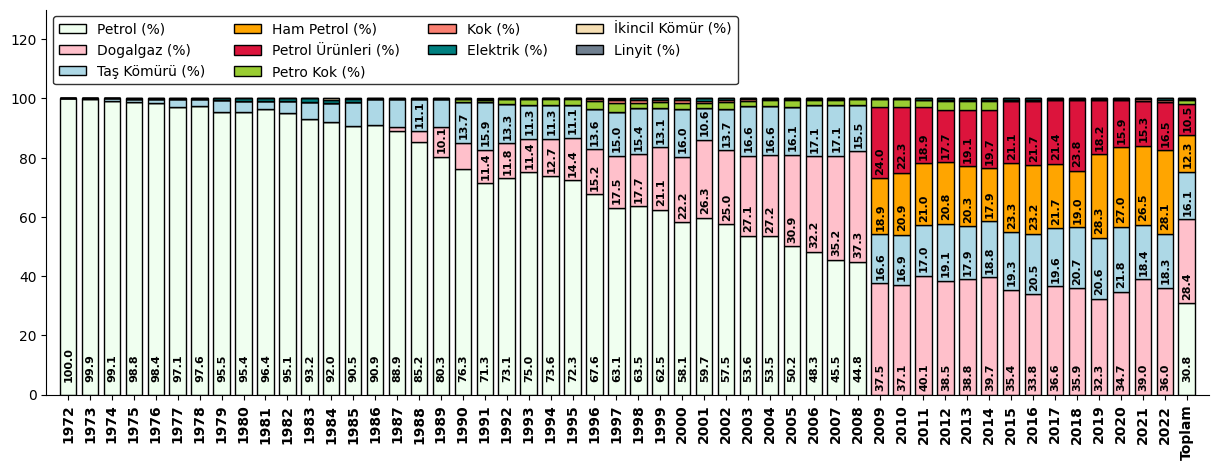

In [129]:
plot(df_ithalat2)

### Şekil 14: Çevrim ve Enerji Sektörü Enerji Türlerine Göre Çıktı Payları (1972-2021) 

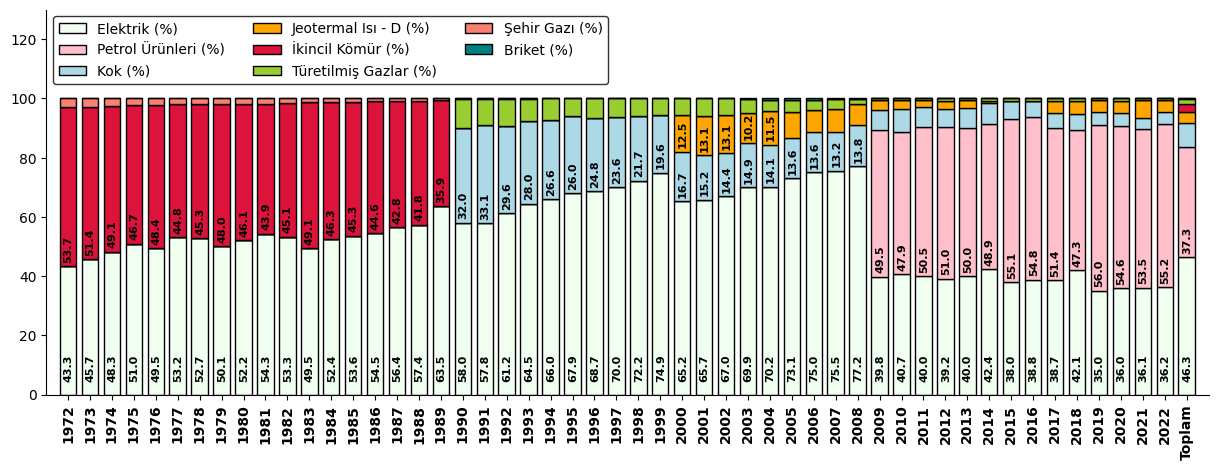

In [130]:
plot(df_CES_arz2)

### Şekil 15: Toplam Enerji Kullanımı (1972 - 2021) (Denklem 16)

In [131]:
df_toplam_kullanım = pd.DataFrame(index = range(1972, 2023),
                           columns = ["Yurtiçi Kullanım", "İhracat", "İhrakiye"])

df_toplam_kullanım["Yurtiçi Kullanım"]  = df_sektörler2["Toplam"].to_numpy()[:-1] + df_CES_kullanım2["Toplam"].to_numpy()[:-1]
df_toplam_kullanım["İhracat"]           = df_ihracat2["Toplam"].to_numpy()[:-1] 
df_toplam_kullanım["İhrakiye"]          = df_ihrakiye2["Toplam"].to_numpy()[:-1] 
df_toplam_kullanım["Toplam"] = np.sum(df_toplam_kullanım, axis = 1)
df_toplam_kullanım.head(2)

,Yurtiçi Kullanım,İhracat,İhrakiye,Toplam
1972,24284.016,922.95,110.25,25317.216
1973,26462.118,856.80,90.30,27409.218


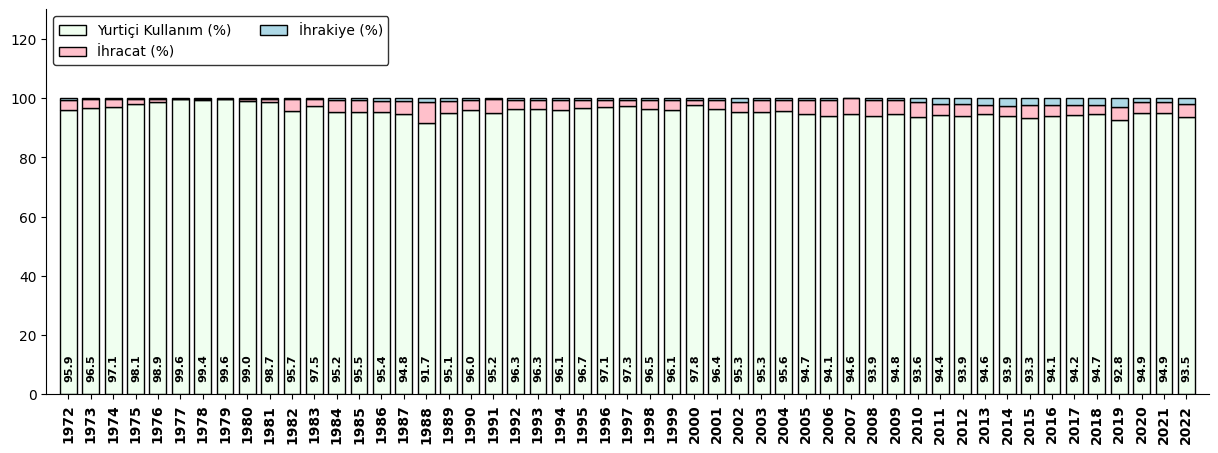

In [132]:
plot(df_toplam_kullanım)

### Şekil 16: Toplam Yurtiçi Enerji Kullanımı (1972 - 2021) (Denklem 17)

In [133]:
df_yurtiçi_kullanım = pd.DataFrame(index = range(1972, 2023),
                           columns = ["Çevrim ve Enerji", "Nihai Birimler"])

df_yurtiçi_kullanım["Çevrim ve Enerji"]  = df_CES_kullanım2["Toplam"].to_numpy()[:-1]
df_yurtiçi_kullanım["Nihai Birimler"]    = df_sektörler2["Toplam"].to_numpy()[:-1] 
df_yurtiçi_kullanım["Toplam"] = np.sum(df_yurtiçi_kullanım, axis = 1)


df_yurtiçi_kullanım.head(2)

,Çevrim ve Enerji,Nihai Birimler,Toplam
1972,4709.834,19574.182,24284.016
1973,5596.608,20865.510,26462.118


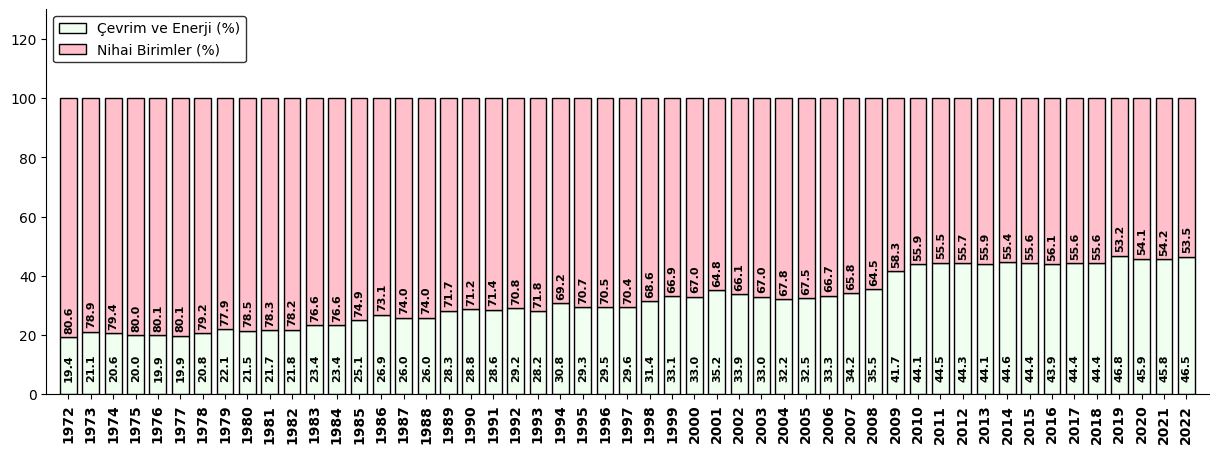

In [134]:
plot(df_yurtiçi_kullanım)

### Şekil 17: ÇES Enerji Kullanımının Enerji Türlerine Göre Dağılımı (1972 - 2021) 

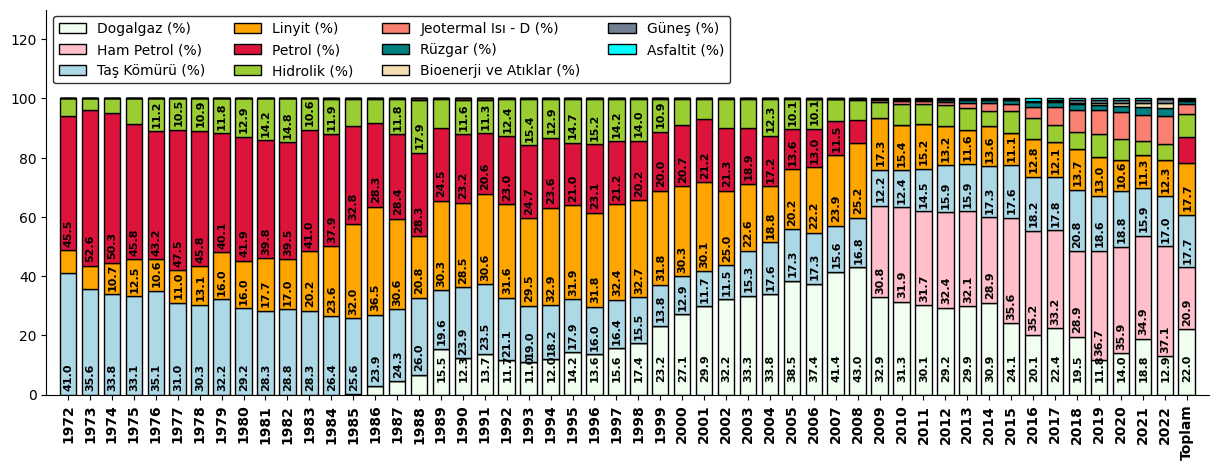

In [135]:
plot(df_CES_kullanım2)

### Şekil 18: Nihai İktisadi Birimlerin Toplam Enerji Kullanımının Dağılımı (1972 - 2021) (Denklem 18)

In [136]:
df_nihai_kullanım = pd.DataFrame(index = range(1972, 2023),
                           columns = ["Sanayi", "Ulaşım","Diğer Sektörler","Enerji Dışı" ])

df_nihai_kullanım["Sanayi"]          = df_sanayi2["Toplam"].to_numpy()[:-1]
df_nihai_kullanım["Ulaşım"]          = df_ulasim2["Toplam"].to_numpy()[:-1] 
df_nihai_kullanım["Diğer Sektörler"] = df_diger_sektör2["Toplam"].to_numpy()[:-1]
df_nihai_kullanım["Enerji Dışı"]     = df_enerji_disi2["Toplam"].to_numpy()[:-1] 

df_nihai_kullanım["Toplam"] = np.sum(df_nihai_kullanım, axis = 1)
df_nihai_kullanım.loc["Toplam"] = np.sum(df_nihai_kullanım)

df_nihai_kullanım.head(2)

,Sanayi,Ulaşım,Diğer Sektörler,Enerji Dışı,Toplam
1972,4799.362,3884.418,10504.002,386.40,19574.182
1973,5185.690,4297.622,10931.748,450.45,20865.510


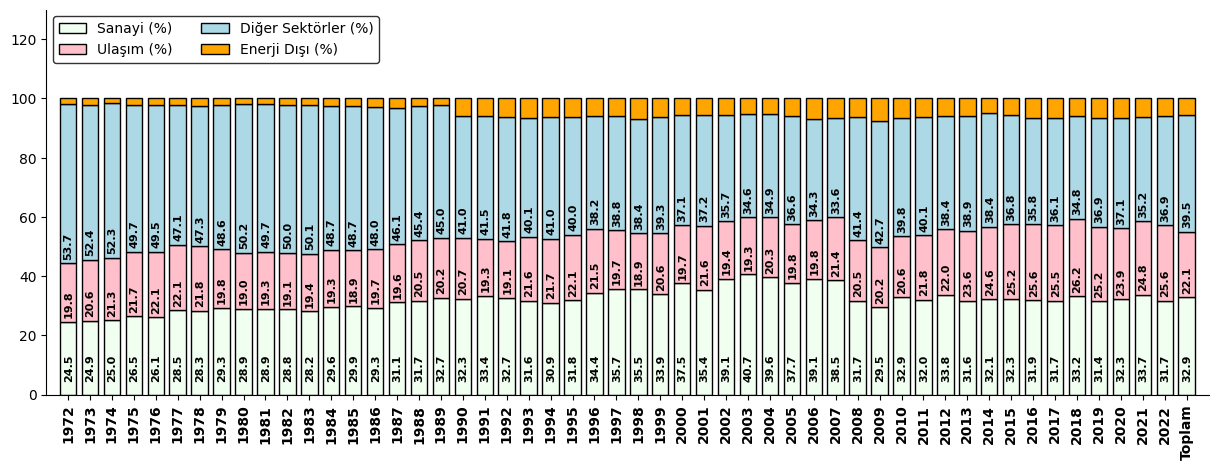

In [137]:
plot(df_nihai_kullanım)

### Şekil 19: Diğer Sektörler Toplam Enerji Kullanımının Dağılımı (1972 - 2021) (Denklem 19)

In [138]:
df_diger = pd.DataFrame(index = range(1972, 2023),
                           columns = ["Konut", "Konut ve Hizmet","Tarım","Ticaret ve Hizmetler", "Tarım ve Hayvancılık" ])

df_diger["Konut"]                  = df_konut2["Toplam"].to_numpy()[:-1]
df_diger["Konut ve Hizmet"]        = df_konut_hizmet2["Toplam"].to_numpy()[:-1] 
df_diger["Tarım"]                  = df_tarim2["Toplam"].to_numpy()[:-1]
df_diger["Ticaret ve Hizmetler"]   = df_tic_hzm2["Toplam"].to_numpy()[:-1] 
df_diger["Tarım ve Hayvancılık"]   = df_tarim_hayv2["Toplam"].to_numpy()[:-1] 

df_diger["Toplam"] = np.sum(df_diger, axis = 1)

df_diger.head(2)

,Konut,Konut ve Hizmet,Tarım,Ticaret ve Hizmetler,Tarım ve Hayvancılık,Toplam
1972,0.0,9787.010,716.992,0.0,0.0,10504.002
1973,0.0,10209.954,721.794,0.0,0.0,10931.748


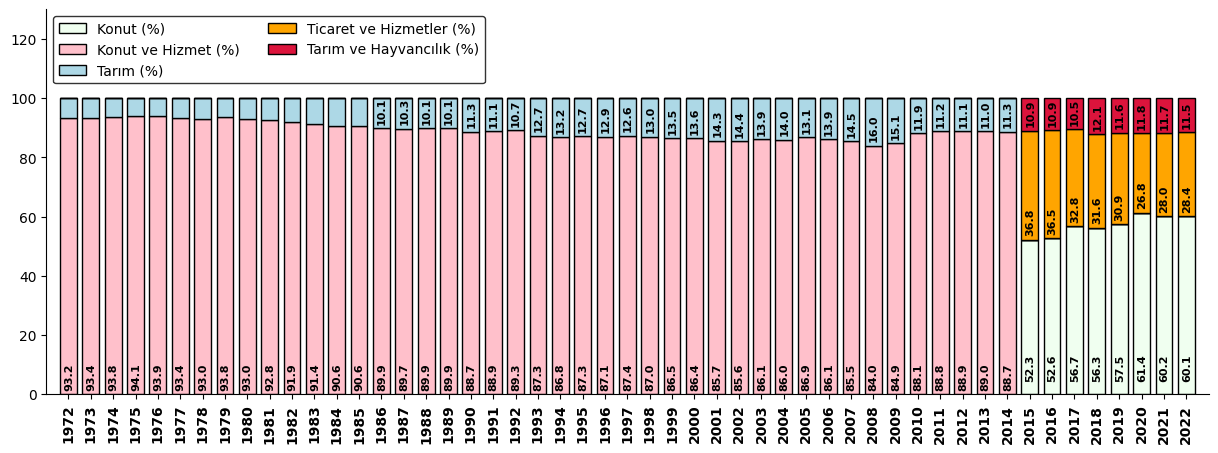

In [139]:
plot(df_diger)

### Şekil 20: Yurtiçi Sektörler Enerji Kullanımının Enerji Türlerine Göre Dağılımı (1972 - 2021) 

In [140]:
df_tum_sektorler = pd.DataFrame(index = range(1972, 2023),
                             columns = ["Çevrim ve Enerji", "Sanayi", "Ulaşım", "Konut", "Konut ve Hizmet","Tarım","Ticaret ve Hizmetler", "Tarım ve Hayvancılık","Enerji Dışı",  ])

df_tum_sektorler["Sanayi"]                 = df_sanayi2["Toplam"].to_numpy()[:-1]
df_tum_sektorler["Ulaşım"]                 = df_ulasim2["Toplam"].to_numpy()[:-1] 
df_tum_sektorler["Konut"]                  = df_konut2["Toplam"].to_numpy()[:-1]
df_tum_sektorler["Konut ve Hizmet"]        = df_konut_hizmet2["Toplam"].to_numpy()[:-1] 
df_tum_sektorler["Tarım"]                  = df_tarim2["Toplam"].to_numpy()[:-1]
df_tum_sektorler["Ticaret ve Hizmetler"]   = df_tic_hzm2["Toplam"].to_numpy()[:-1] 
df_tum_sektorler["Tarım ve Hayvancılık"]   = df_tarim_hayv2["Toplam"].to_numpy()[:-1] 
df_tum_sektorler["Enerji Dışı"]            = df_enerji_disi2["Toplam"].to_numpy()[:-1] 
df_tum_sektorler["Çevrim ve Enerji"]       = df_CES_kullanım2["Toplam"].to_numpy()[:-1]


df_tum_sektorler["Toplam"] = np.sum(df_tum_sektorler, axis = 1)
df_tum_sektorler.loc["Toplam"] = np.sum(df_tum_sektorler)

df_tum_sektorler.head(3)

,Çevrim ve Enerji,Sanayi,Ulaşım,Konut,Konut ve Hizmet,Tarım,Ticaret ve Hizmetler,Tarım ve Hayvancılık,Enerji Dışı,Toplam
1972,4709.834,4799.362,3884.418,0.0,9787.010,716.992,0.0,0.0,386.40,24284.016
1973,5596.608,5185.690,4297.622,0.0,10209.954,721.794,0.0,0.0,450.45,26462.118
1974,5681.126,5461.854,4644.928,0.0,10711.090,708.402,0.0,0.0,320.25,27527.650


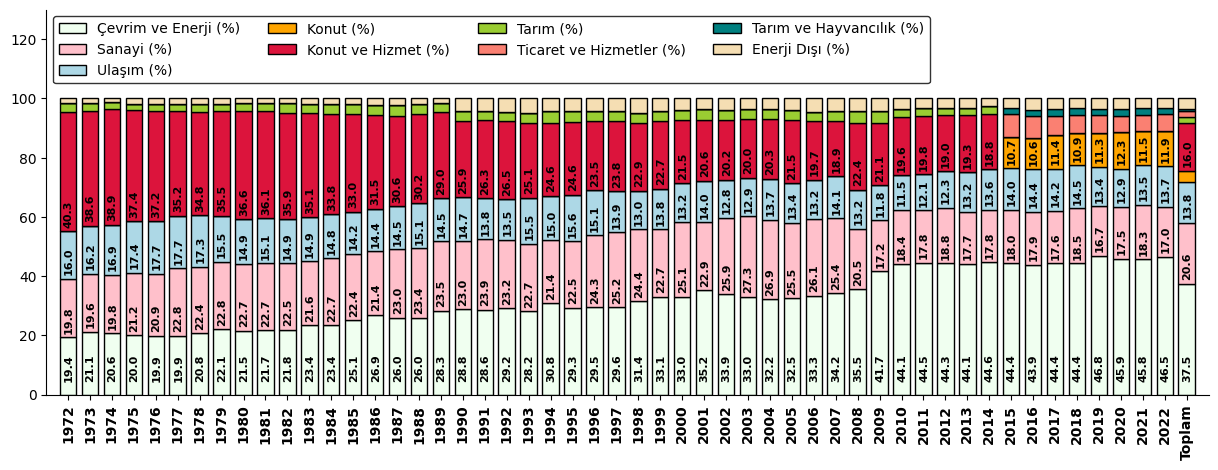

In [141]:
plot(df_tum_sektorler)